In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 256
x_test = x_test.astype('float32') / 256

print(x_train.shape)

(60000, 28, 28)


In [3]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(784, activation='sigmoid')(encoded)

In [5]:
autoencoder = Model(input_layer, decoded)

In [6]:
encoder = Model(input_layer, encoded)

In [7]:
input_layer_decoder = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1](input_layer_decoder)
decoder = Model(input_layer_decoder, decoder_layer)

In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 6s 23ms/step - loss: 0.2481 - val_loss: 0.1655
Epoch 2/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1460 - val_loss: 0.1272
Epoch 3/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1185 - val_loss: 0.1090
Epoch 4/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1044 - val_loss: 0.0981
Epoch 5/50
235/235 [==============================] - 6s 26ms/step - loss: 0.0955 - val_loss: 0.0909
Epoch 6/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0894 - val_loss: 0.0862
Epoch 7/50
235/235 [==============================] - 3s 15ms/step - loss: 0.0852 - val_loss: 0.0828
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0824 - val_loss: 0.0805
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0804 - val_loss: 0.0788
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0790 - val_lo

In [10]:
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

In [11]:
def visualize(data, size):
    n = 8
    plt.figure(figsize=(20,4))
    plt.gray()
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(data[i].reshape(size,size))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

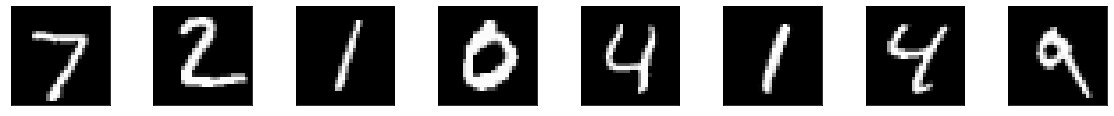

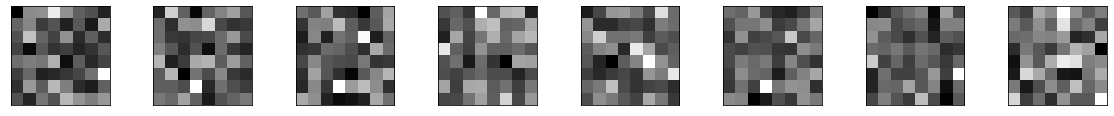

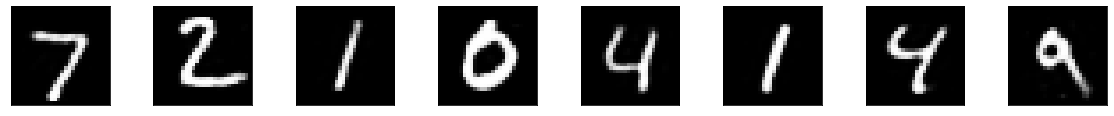

In [12]:
visualize(x_test, 28)
visualize(encoded_images, 8)
visualize(decoded_images, 28)